# Importando bibliotecas

In [93]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Removendo ruidos do dataset

<strong>species =</strong> Especies</br>
<strong>island =</strong> Ilha</br>
<strong>bill_length_mm =</strong> Comprimento do bico</br>
<strong>bill_depth_mm =</strong> Profundidade do bico</br>
<strong>flipper_length_mm =</strong> Comprimento da nadadeira</br>
<strong>body_mass_g =</strong> Massa corporal</br>
<strong>sex =</strong> Sexo</br>

In [135]:
dataframe_penguins = pd.read_csv('penguins.csv')
# dataframe_penguins.shape # (n records, n columns)

# dataframe_penguins.describe()
# dataframe_penguins.values
# as colunas que não aparece provavelmente tem valores "incorretos"
# std = standart deviation, que é a variação entre os valores

print('\033[33mRemovendo ruido do dataset...\n\033[m')
dataframe_penguins = dataframe_penguins.dropna(subset='species') # Remove todos os NaN da coluna species
dataframe_penguins = dataframe_penguins.dropna(subset='island') 
dataframe_penguins = dataframe_penguins.dropna(subset='sex') 

temp_classes = dataframe_penguins['species'].unique().copy()
dataframe_penguins['species'] = dataframe_penguins['species'].replace(to_replace=temp_classes, value=[i for i in range(len(temp_classes))])

temp_classes = dataframe_penguins['island'].unique().copy()
dataframe_penguins['island'] = dataframe_penguins['island'].replace(to_replace=temp_classes, value=[i for i in range(len(temp_classes))])

# Agrupar por espécies e preencher NaN com a média de cada grupo
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataframe_penguins[cols] = dataframe_penguins.groupby(
    'species')[cols].transform(lambda x: x.fillna(x.mean()))

# Formatar as colunas numéricas com 3 casas decimais
dataframe_penguins[cols] = dataframe_penguins[cols].applymap('{:.3f}'.format)

# Resetar o índice e manter a coluna 'sex' no final
dataframe_penguins = dataframe_penguins.reset_index(drop=True)[
    ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
dataframe_penguins.head(10)

Removendo ruido do dataset...



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.100,18.700,181.000,3750.000,MALE
1,0,0,39.500,17.400,186.000,3800.000,FEMALE
2,0,0,40.300,18.000,195.000,3250.000,FEMALE
3,0,0,36.700,19.300,193.000,3450.000,FEMALE
4,0,0,39.300,20.600,190.000,3650.000,MALE
5,0,0,38.900,17.800,181.000,3625.000,FEMALE
6,0,0,39.200,19.600,195.000,4675.000,MALE
7,0,0,41.100,17.600,182.000,3200.000,FEMALE
8,0,0,38.600,21.200,191.000,3800.000,MALE
9,0,0,34.600,21.100,198.000,4400.000,MALE


# Criando o modelo de treinamento

In [136]:
print('\033[33mCriando modelo da árvore de decisão...\033[m')
model = DecisionTreeClassifier()

Criando modelo da árvore de decisão...


# Treinando

In [137]:
x = dataframe_penguins.drop(columns=['sex']) # entrada
y = dataframe_penguins['sex'] # saida
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # alocando 20% dos dados pra teste
# as primeiras vareaveis são a saida de treinamento, e as outras duas são a saida de test

model.fit(x_train, y_train)

DecisionTreeClassifier()

# Plotando a arvore de decisões

[Text(0.3742732558139535, 0.9545454545454546, 'Massa corporal <= 3712.5\ngini = 0.5\nsamples = 266\nvalue = [133, 133]\nclass = FEMALE'),
 Text(0.18604651162790697, 0.8636363636363636, 'Profundidade do bico <= 18.55\ngini = 0.296\nsamples = 94\nvalue = [77, 17]\nclass = FEMALE'),
 Text(0.09302325581395349, 0.7727272727272727, 'Comprimento do bico <= 47.75\ngini = 0.055\nsamples = 71\nvalue = [69, 2]\nclass = FEMALE'),
 Text(0.046511627906976744, 0.6818181818181818, 'Comprimento do bico <= 40.55\ngini = 0.03\nsamples = 66\nvalue = [65, 1]\nclass = FEMALE'),
 Text(0.023255813953488372, 0.5909090909090909, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]\nclass = FEMALE'),
 Text(0.06976744186046512, 0.5909090909090909, 'Comprimento do bico <= 40.75\ngini = 0.087\nsamples = 22\nvalue = [21, 1]\nclass = FEMALE'),
 Text(0.046511627906976744, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = MALE'),
 Text(0.09302325581395349, 0.5, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = FEMALE'),
 

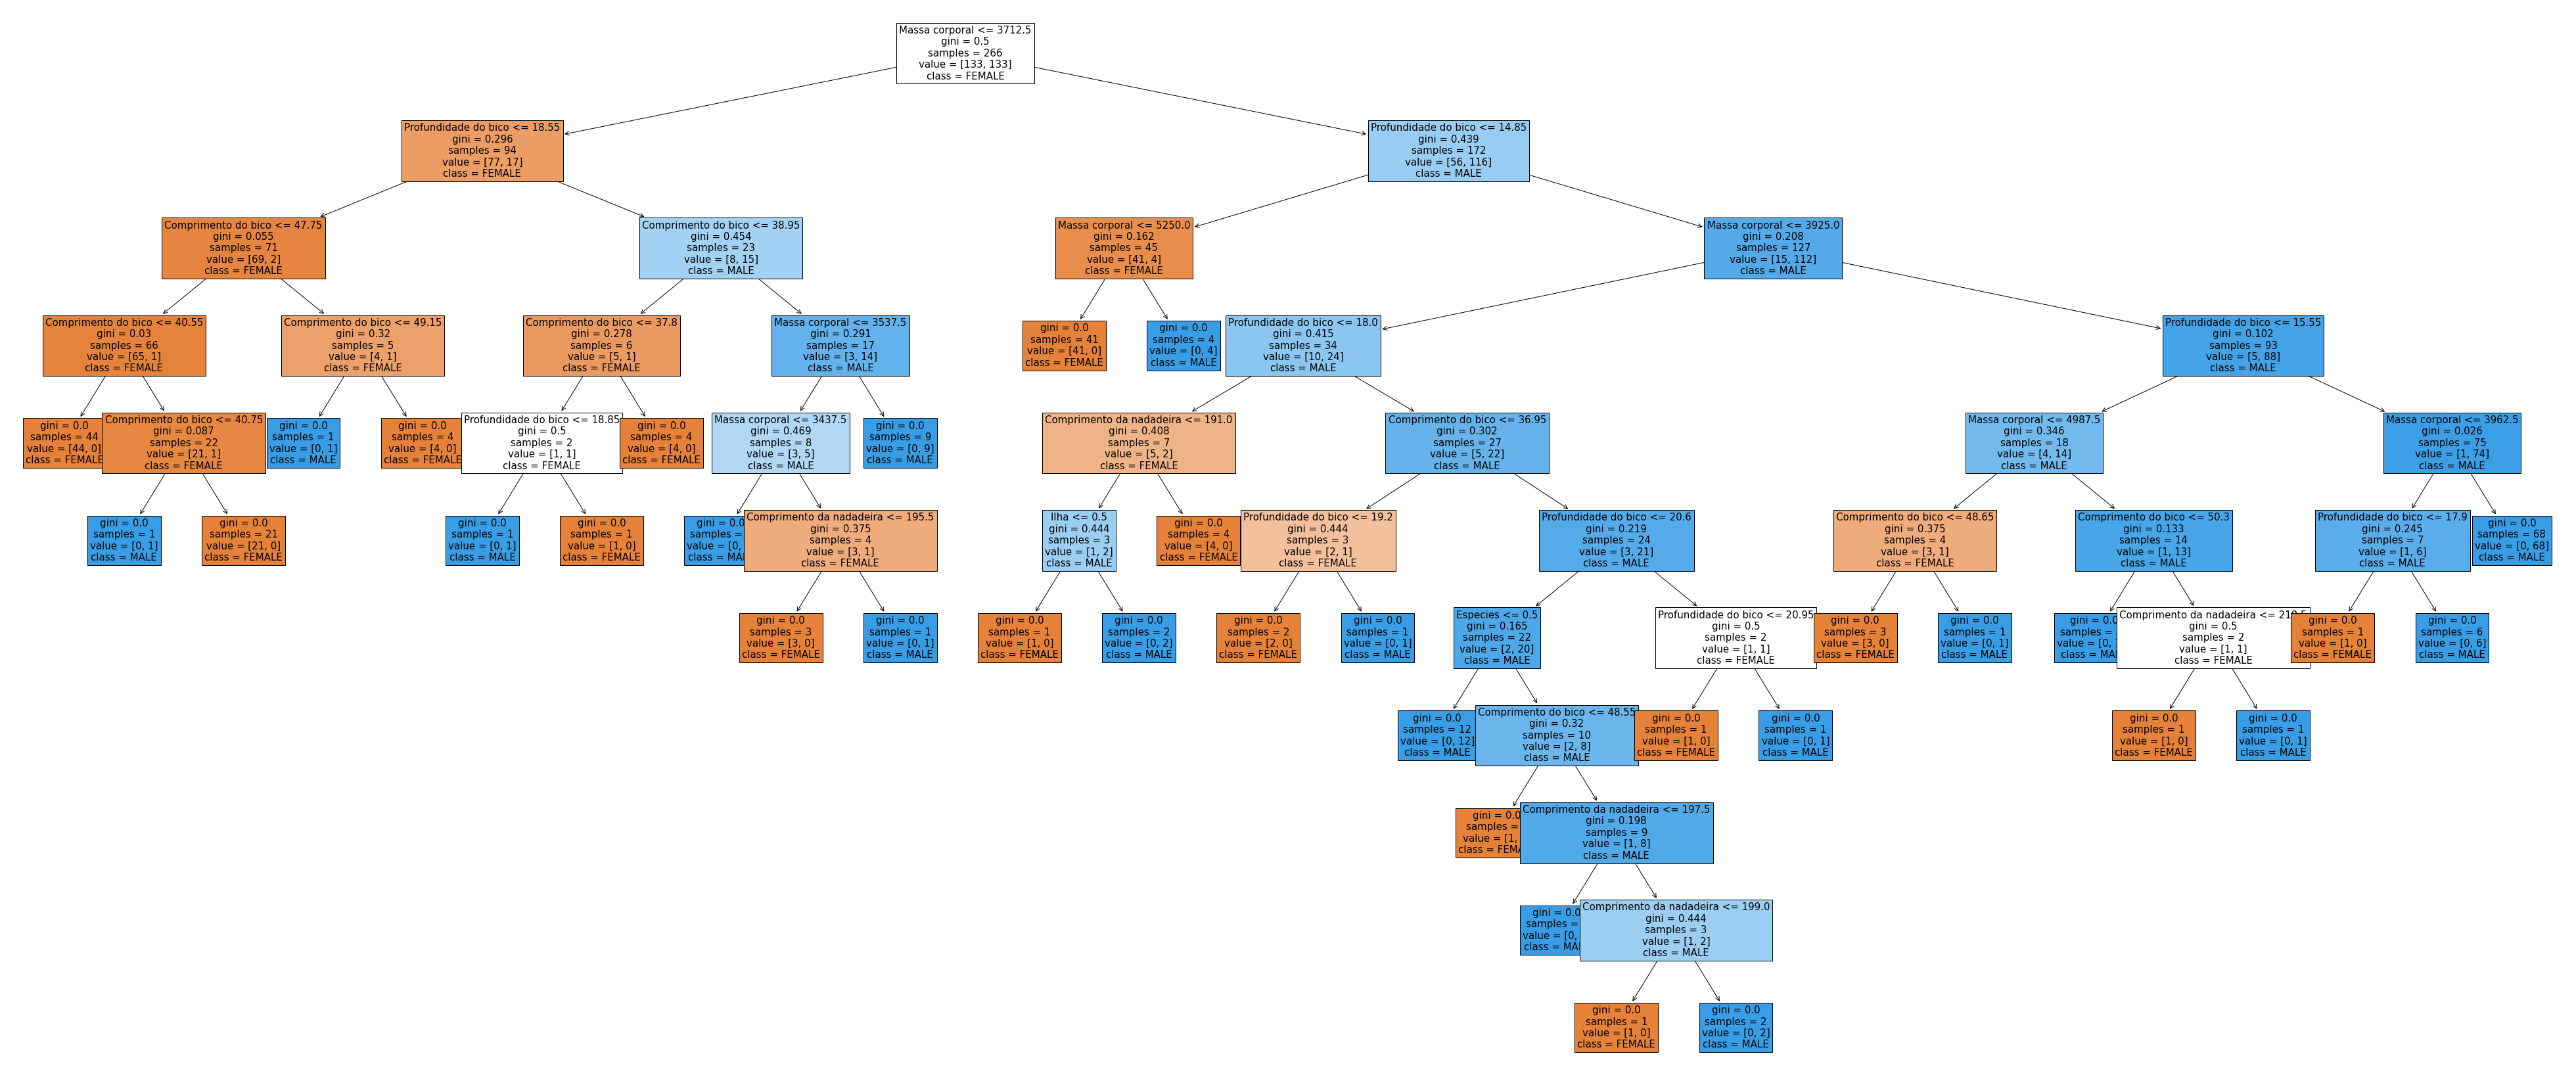

In [140]:
names = ["Especies", "Ilha", "Comprimento do bico","Profundidade do bico","Comprimento da nadadeira","Massa corporal","Sexo"]

# The class names are stored in decision_tree_classifier.classes_, i.e. the classes_ attribute of your DecisionTreeClassifier instance. 
# And the feature names should be the columns of your input dataframe. For your case you will have
feature_names = list(dataframe_penguins.columns)
class_names = model.classes_

# print(tree.export_text(model))
# the good is small size, and big DPI
plt.figure(figsize=(70,30))
tree.plot_tree(model, 
                   feature_names=names,  
                   class_names=class_names,
                   fontsize=15,
                   filled=True)
# plt.savefig('tree_high_dpi', dpi=200)



# Testando a acuracia 

In [141]:
predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions)
score

0.9253731343283582